In [17]:
import pandas as pd
df = pd.read_csv("../outputs/engineered_transactions.csv")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8316\3433041610.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TX_FRAUD', palette='Set2')


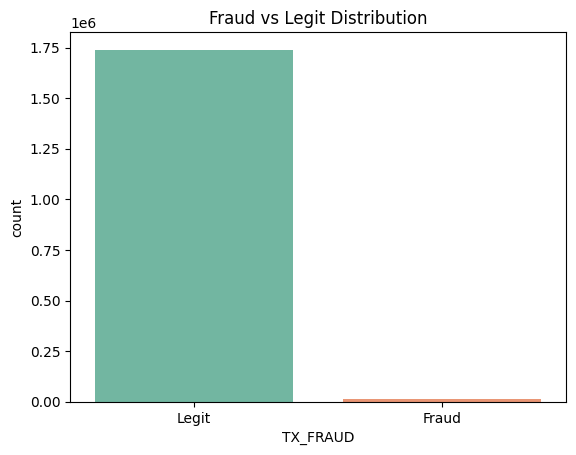

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='TX_FRAUD', palette='Set2')
plt.xticks([0, 1], ['Legit', 'Fraud'])
plt.title("Fraud vs Legit Distribution")
plt.show()


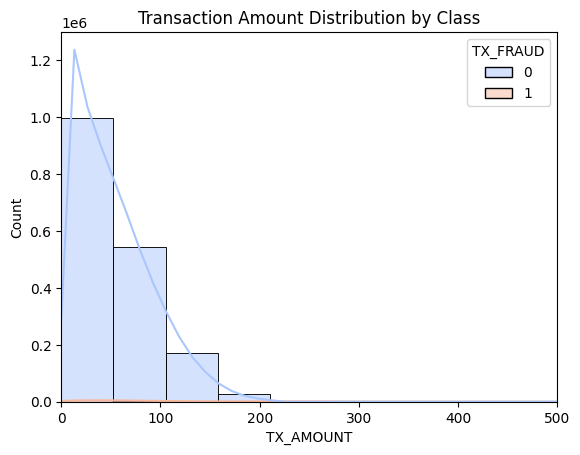

In [12]:
sns.histplot(data=df, x='TX_AMOUNT', hue='TX_FRAUD', kde=True, bins=50, palette='coolwarm')
plt.title("Transaction Amount Distribution by Class")
plt.xlim(0, 500)  # Cut off high outliers
plt.show()


In [13]:
print(df.columns.tolist())

['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD', 'TX_FRAUD_SCENARIO', 'IS_HIGH_AMOUNT', 'CUSTOMER_TX_COUNT_7D', 'TERMINAL_FRAUD_COUNT_28D', 'CUSTOMER_AVG_AMOUNT_7D', 'AMOUNT_TO_AVG_RATIO']


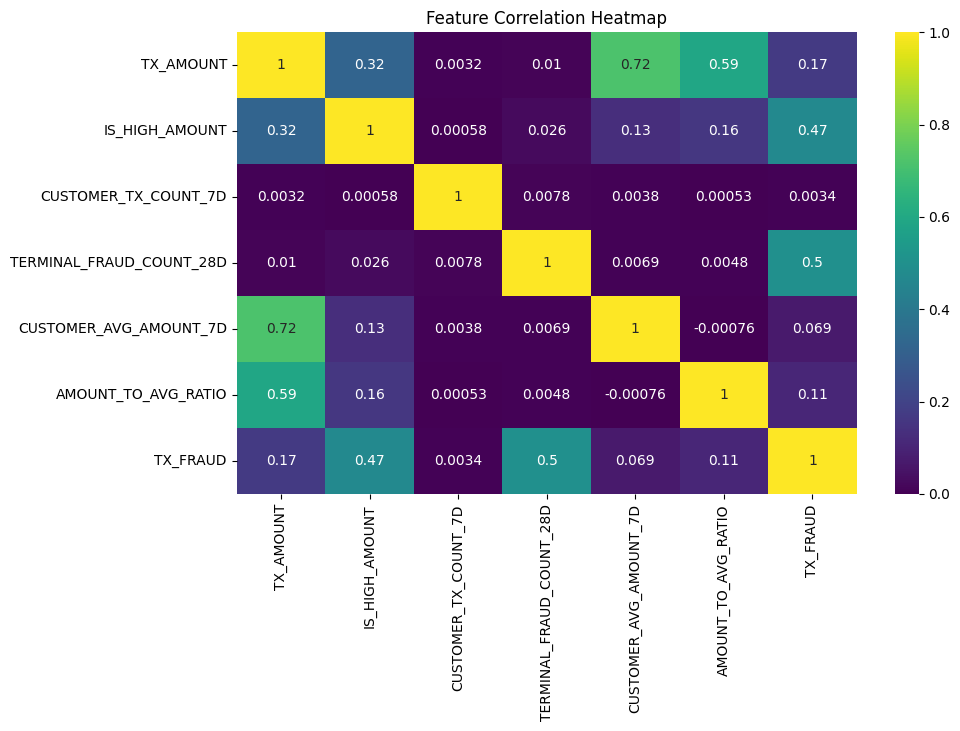

In [14]:
features = [
    'TX_AMOUNT',
    'IS_HIGH_AMOUNT',
    'CUSTOMER_TX_COUNT_7D',
    'TERMINAL_FRAUD_COUNT_28D',
    'CUSTOMER_AVG_AMOUNT_7D',
    'AMOUNT_TO_AVG_RATIO',
    'TX_FRAUD'
]

corr = df[features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8316\298681177.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TX_FRAUD', y='TX_AMOUNT', palette='Set2')


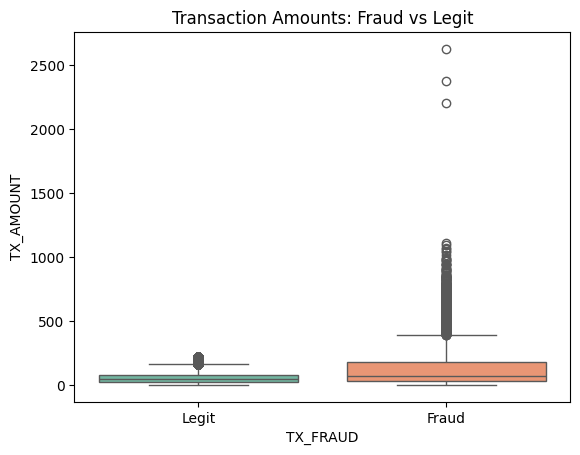

In [15]:
sns.boxplot(data=df, x='TX_FRAUD', y='TX_AMOUNT', palette='Set2')
plt.xticks([0, 1], ['Legit', 'Fraud'])
plt.title("Transaction Amounts: Fraud vs Legit")
plt.show()


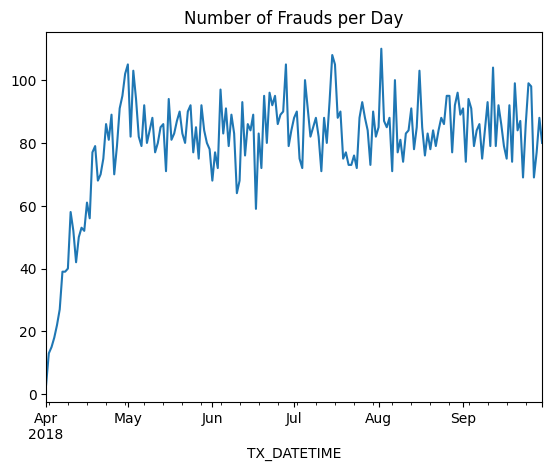

In [16]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df.set_index('TX_DATETIME').resample('D')['TX_FRAUD'].sum().plot()
plt.title("Number of Frauds per Day")
plt.show()
